- Download the Mall Customer Segmentation Data from the github repository below (or you can directly use the one attached in the assignment.)
- Use only 3 features (Age, Income and Spending Score) and run k-means algorithm. Determine/choose the optimum "k" value using the elbow method. Show your plot (error vs. k) and comment on plots. 
- Again with the same 3 features, scatter your data in a 3D plot. Coloring of samples should denote the determined categories (your optimum k). I.e. we should be able to distinguish the samples of k categories. Comment on optimum k value.

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
!git clone https://github.com/UMBC-Data-Science/DATA602Datasets.git
df = pd.read_csv("./DATA602Datasets/Mall_Customers.csv")
df.head(3)

fatal: destination path 'DATA602Datasets' already exists and is not an empty directory.


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [7]:
df = df.iloc[:,2:]
df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


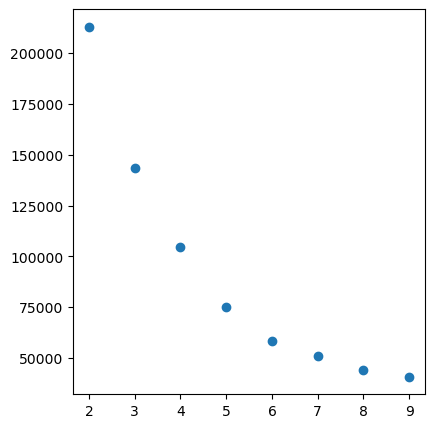

In [8]:
scores = []

for k in range(2, 10):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(df)
  scores.append( -kmeans.score(df) )
  
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.plot([k for k in range(2,10)], scores, 'o')
# elbow method show that optimum k value is 6 

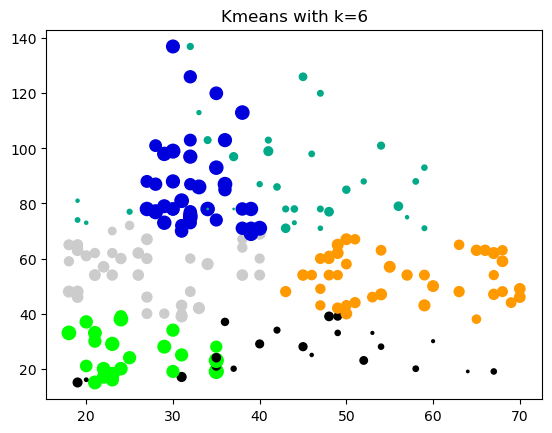

In [9]:
n_clusters=6
y_pred = KMeans(n_clusters=n_clusters).fit_predict(df)
plt.scatter(df.iloc[:,0], df.iloc[:, 1], df.iloc[:, 2],c=y_pred, cmap=plt.cm.nipy_spectral)
plt.title("Kmeans with k=" + str(n_clusters))

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

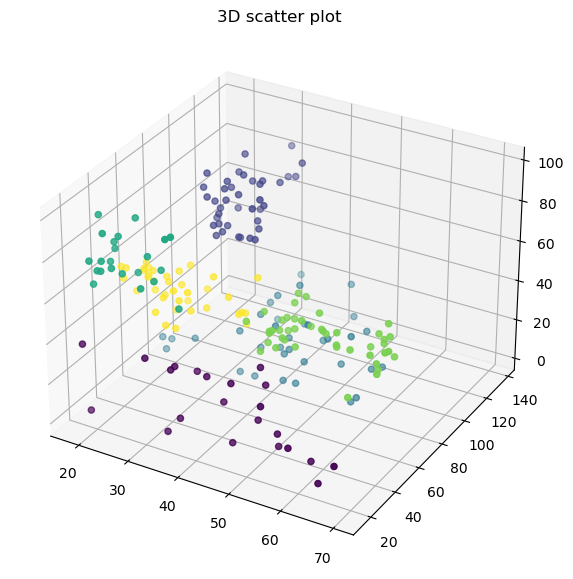

In [10]:
from mpl_toolkits import mplot3d
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(df.iloc[:,0], df.iloc[:, 1], df.iloc[:,2], c=y_pred)
plt.title("3D scatter plot")
plt.show